In [178]:
#getting the goods
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [179]:
auction = pd.read_csv('data/auction.csv')

In [180]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [181]:
auction.info()
#looked and saw some of the missing bidder values were where the item was Xbox
#want to only look at watches --> new df where only items are watches (see below) - 1953 items no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [182]:
auction = auction[auction.item == "Cartier wristwatch"]
auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 9 columns):
auctionid       1953 non-null int64
bid             1953 non-null float64
bidtime         1953 non-null float64
bidder          1953 non-null object
bidderrate      1953 non-null float64
openbid         1953 non-null float64
price           1953 non-null float64
item            1953 non-null object
auction_type    1953 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 152.6+ KB


In [183]:
#1953 auction items - all items are Cartir wristwatch
#auctionid - unique identifier of an auction  (do we think lot?)
#bid - proxy bid placed by a bidder
#bidtime 0 the time in days that the bid way placed prior to the start of the auction
#bidder - eBay username of the bidder
#bidderrate - eBay feedback rating of the bidder...
#open bid - the opening bid set by the seller
#price - the closing price (second highest bid + increment)
#item - auction item (all Cartier wristwatches)
#auction_type - duration: 3, 5, or 7 day

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9a6048>,
      dtype=object)

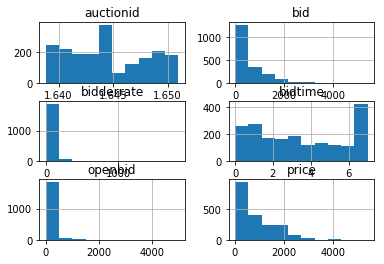

In [184]:
auction.hist()
#want to spread these out

In [185]:
auction.auctionid.nunique()

136

In [186]:
auction.bidder.nunique()

678

In [187]:
auction.bid.nunique()

692

In [188]:
#how many bidders are winners? - who bid the highest
#how many bidders/buyers are in crossover sales
#does the bidderrate correlate at all with the amount spent?
#price -> spread between winner?
#groupby & apply

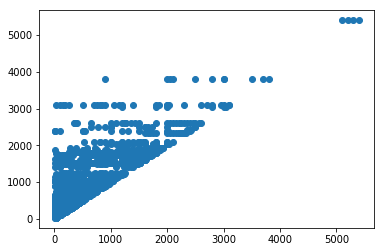

In [189]:
plt.scatter(x = "bid", y = "price", data = auction)

In [190]:
auction.groupby("auction_type").max()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item
auction_type,,,,,,,,
3 day auction,1649726994,2500.0,2.999965,yung-wen,1838.0,1200.0,2500.0,Cartier wristwatch
5 day auction,1650406935,2425.0,4.999977,zonaone2001,1287.0,2350.0,2425.0,Cartier wristwatch
7 day auction,1650986455,5400.0,6.999965,zmxu,1303.0,5000.0,5400.0,Cartier wristwatch


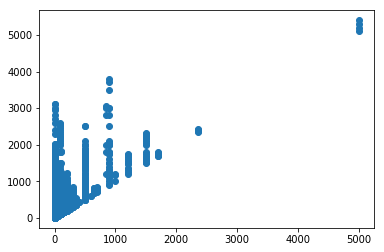

In [191]:
plt.scatter(x = "openbid", y = "bid", data = auction)

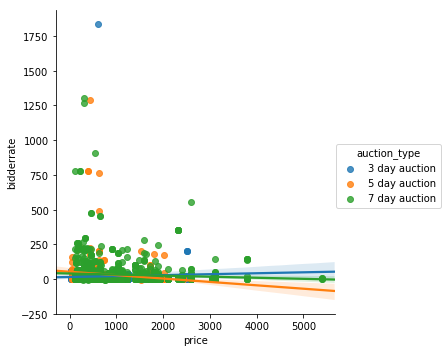

In [192]:
sns.lmplot( "price", "bidderrate", auction, hue = "auction_type")

In [193]:
#correlation between bidderrate & price

In [194]:
#def spread(lot):
auction.price.nunique()

112

In [195]:
auction.groupby(["auctionid", "bidder"]).head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
5,1639453840,1.00,0.355856,bfalconb,2.0,1.00,355.00,Cartier wristwatch,3 day auction
6,1639453840,1.25,0.484757,sbord,1.0,1.00,355.00,Cartier wristwatch,3 day auction
7,1639453840,1.50,0.492639,bfalconb,2.0,1.00,355.00,Cartier wristwatch,3 day auction
8,1639453840,25.00,0.494630,sbord,1.0,1.00,355.00,Cartier wristwatch,3 day auction
9,1639453840,2.00,0.511169,bfalconb,2.0,1.00,355.00,Cartier wristwatch,3 day auction


In [196]:
auction["spread"] = auction.price - auction.bid
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0


In [197]:
#for value in auction.spread:
    #if auction["spread"] == 0:
  #      True
    #else:
     #   False

auction["buyer"] = np.where(auction["spread"] == 0, True, False)

auction.head()

#now i need to figure out how how to also make sure that all clients who win are noted as winning for bids that are also not spread = 0

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,buyer
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction,2.5,False
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction,77.5,False
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,57.5,False
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction,27.5,False
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction,0.0,True


In [198]:
auction.groupby("auctionid").count().sort_values("bid").tail()

,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,buyer
auctionid,,,,,,,,,,
1639453840,33,33,33,33,33,33,33,33,33,33
1640809333,40,40,40,40,40,40,40,40,40,40
1650406935,41,41,41,41,41,41,41,41,41,41
1649028956,42,42,42,42,42,42,42,42,42,42
1644594033,46,46,46,46,46,46,46,46,46,46


In [199]:
auction.groupby("auctionid")['bid'].value_counts()

auctionid   bid    
1638843936  500.00     1
            600.00     1
            800.00     1
            1500.00    1
            1550.00    1
            1600.00    1
            1625.00    1
1638844284  225.00     1
            500.00     1
1638844464  450.00     2
            300.00     1
            305.00     1
            500.00     1
            505.78     1
            551.00     1
            560.00     1
            570.00     1
            601.00     1
            610.00     1
            635.00     1
            660.00     1
            700.00     1
            730.00     1
            740.00     1
1638844729  310.00     2
            225.00     1
            250.00     1
            260.00     1
            270.00     1
            280.00     1
                      ..
1650530689  2000.00    1
            2800.00    1
            3000.00    1
            3050.00    1
1650699048  10.00      1
            25.00      1
            30.00      1
            50.00      1
     

In [200]:
auction[auction["buyer"] == True].count()

auctionid       148
bid             148
bidtime         148
bidder          148
bidderrate      148
openbid         148
price           148
item            148
auction_type    148
spread          148
buyer           148
dtype: int64

In [201]:
dfspread = auction[["spread","auctionid"]]
dfspread.head()
dfspread[(dfspread["spread"] == 0) & (dfspread["auctionid"].count()>1)]

,spread,auctionid
4,0.0,1638893549
37,0.0,1639453840
42,0.0,1641142160
53,0.0,1642243766
68,0.0,1643075711
95,0.0,1643544538
118,0.0,1643885624
126,0.0,1643903116
134,0.0,1643903372
135,0.0,1643903372


In [202]:
dfspreadnil = dfspread[dfspread["spread"] == 0]
dfspreadnil["auctionid"].value_counts().sort_values(ascending = False)

1641783552    2
1650986455    2
1649726994    2
1649848613    2
1648968984    2
1643903372    2
1644681469    2
1641722275    2
1642424500    2
1649173313    2
1640936328    2
1640179146    2
1643201832    1
1650406935    1
1650515990    1
1641880908    1
1639309309    1
1645594382    1
1639226378    1
1644357387    1
1648706567    1
1641142160    1
1638843936    1
1650981438    1
1644109746    1
1642876200    1
1645883276    1
1649845539    1
1642421109    1
1648176677    1
             ..
1642911743    1
1646079608    1
1649858595    1
1644752795    1
1646988233    1
1642514892    1
1644252877    1
1639253454    1
1648363974    1
1642005995    1
1646448593    1
1641457876    1
1649639405    1
1644138548    1
1648252368    1
1639425502    1
1649808226    1
1648782304    1
1648193761    1
1649944294    1
1650162165    1
1641962219    1
1641154540    1
1638893549    1
1641587440    1
1648661746    1
1650530689    1
1648613621    1
1640257270    1
1643885624    1
Name: auctionid, Length:

In [203]:
#1641783552    2
#1650986455    2
#1649726994    2
#1649848613    2
#1648968984    2
#1643903372    2
#1644681469    2
#1641722275    2
#1642424500    2
#1649173313    2
#1640936328    2
#1640179146    2

auction[auction["auctionid"] == 1641783552]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,buyer
962,1641783552,1200.0,0.150822,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,725.0,False
963,1641783552,275.0,0.272546,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1650.0,False
964,1641783552,375.0,0.272731,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1550.0,False
965,1641783552,575.0,0.273657,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1350.0,False
966,1641783552,725.0,0.273854,en-igma,2.0,1.0,1925.0,Cartier wristwatch,7 day auction,1200.0,False
967,1641783552,1250.0,0.685359,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,675.0,False
968,1641783552,1500.0,0.690799,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,425.0,False
969,1641783552,1500.0,0.828762,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,425.0,False
970,1641783552,1650.0,0.829028,restdynamics,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,275.0,False
971,1641783552,1800.0,0.867361,dumbarton2715,0.0,1.0,1925.0,Cartier wristwatch,7 day auction,125.0,False


In [204]:
auction[auction["auctionid"] == 1650986455]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,buyer
1948,1650986455,150.00,0.693542,jmsolo,138.0,9.99,405.0,Cartier wristwatch,7 day auction,255.00,False
1949,1650986455,278.75,0.755926,fveta,36.0,9.99,405.0,Cartier wristwatch,7 day auction,126.25,False
1950,1650986455,405.00,0.889213,gram999,12.0,9.99,405.0,Cartier wristwatch,7 day auction,0.00,True
1951,1650986455,400.00,1.693403,sandseller,6.0,9.99,405.0,Cartier wristwatch,7 day auction,5.00,False
1952,1650986455,405.00,2.916481,gram999,12.0,9.99,405.0,Cartier wristwatch,7 day auction,0.00,True


In [205]:
auction[auction["spread"] == 0]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,spread,buyer
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction,0.0,True
37,1639453840,355.00,2.995451,bella@thegrid.net,1.0,1.00,355.00,Cartier wristwatch,3 day auction,0.0,True
42,1641142160,200.01,2.998275,princess-ginger,18.0,99.00,200.01,Cartier wristwatch,3 day auction,0.0,True
53,1642243766,355.00,2.296134,akryzak,1.0,99.99,355.00,Cartier wristwatch,3 day auction,0.0,True
68,1643075711,1225.00,2.999745,6969.ca,25.0,200.00,1225.00,Cartier wristwatch,3 day auction,0.0,True
95,1643544538,405.00,2.981435,yung-wen,1.0,99.00,405.00,Cartier wristwatch,3 day auction,0.0,True
118,1643885624,326.00,2.999826,tverna,3.0,100.00,326.00,Cartier wristwatch,3 day auction,0.0,True
126,1643903116,40.87,2.999965,vnvu009,41.0,9.99,40.87,Cartier wristwatch,3 day auction,0.0,True
134,1643903372,26.00,2.991968,2gd4u,56.0,9.99,26.00,Cartier wristwatch,3 day auction,0.0,True
135,1643903372,26.00,2.998368,2gd4u,56.0,9.99,26.00,Cartier wristwatch,3 day auction,0.0,True


In [206]:
pd.crosstab(auction["auctionid"], auction["buyer"])

buyer,False,True
auctionid,,
1638843936,6,1
1638844284,1,1
1638844464,15,1
1638844729,10,1
1638893549,4,1
1638917885,12,1
1639226378,11,1
1639253454,1,1
1639309309,26,1


In [207]:
auction.

SyntaxError: invalid syntax (<ipython-input-207-34401759dba5>, line 1)

In [ ]:
auction["auctionid"].value_counts().sort_values()

In [ ]:
#auctioncount = auction.groupby("auctionid")["bid"].count()
#auctioncount.head()
#goal: get the count of bids for each auction item
#created a series called a_counts (auctionitem counts) which is the frequency of each auctionid value in auction dataframe
#turned the series into a dictionary so that i could map the the count of bids/item to each item in auction

a_counts = auction["auctionid"].value_counts()
a_counts = a_counts.to_dict()
auction["bidcount"] = auction["auctionid"].map(a_counts)
auction.head()


In [ ]:
auction.dropna(axis = 1)

In [ ]:
auction.groupby("auctionid")['bidder'].value_counts()

In [ ]:
plt.scatter(auction.bidderrate, auction.spread)

In [ ]:
#sns.barplot(x = "bidderrate", y = "spread", data = auction)

In [ ]:
sns.barplot(x = "auction_type", y = "price", data = auction)